# Propuesta Proyecto RecSys 2025

Integrantes: Felipe Abarca, Nicolas Estevez, Alfredo Enrione

## Setup Datos

In [ ]:
from IPython.display import clear_output
!pip install datasets
clear_output()
NUM_SAMPLES = 10000 

In [2]:
from datasets import load_dataset, load_from_disk
dataset_name = "amazon_reviews_books"
try:
    reviews = load_from_disk(dataset_name)
except:
    reviews = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Books", trust_remote_code=True)
    reviews.save_to_disk(dataset_name)
    reviews.cleanup_cache_files()

#try:
#  metadata = load_from_disk("metadata")
#except:
#  metadata = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Books", trust_remote_code=True)
#  metadata.save_to_disk("metadata")
#  metadata.cleanup_cache_files()

Loading dataset from disk:   0%|          | 0/33 [00:00<?, ?it/s]

## Corriendo el modelo

In [3]:
import warnings
from loader import Loader
from utils import run_experiments, sensitivity_analysis
warnings.filterwarnings("ignore")

config = {
    'reg_p': 20,
    'alpha': 0.2,
    'beta': 0.3,
    'drop_p': 0.5,
    'xi': 0.3,
    'eta': 10
}
gamma = 0.5
alpha = 0.5
k_values = [10, 20]


## Amazon Books Reviews

In [4]:
loader = Loader(number_of_samples=NUM_SAMPLES) # By default, it uses the amazon_reviews_books dataset
results_books = run_experiments(loader, config, gamma, alpha, k_values)
sensitivity_books = sensitivity_analysis(loader)

Loading dataset from disk:   0%|          | 0/33 [00:00<?, ?it/s]

Metrics @ 10 for model pipeline (normalization=RLAE): {'precision@10': 0.0, 'recall@10': 0.0, 'ndcg@10': 0.0, 'diversity@10': 0.8862180803029469, 'novelty@10': 12.12974507576347}
Metrics @ 20 for model pipeline (normalization=RLAE): {'precision@20': 0.0005000000000000001, 'recall@20': 0.0021234939759036146, 'ndcg@20': 0.0007947691394405591, 'diversity@20': 0.9432798353336858, 'novelty@20': 12.168026532033542}
Metrics @ 10 for model pipeline (normalization=LAE): {'precision@10': 0.0, 'recall@10': 0.0, 'ndcg@10': 0.0, 'diversity@10': 0.8862180803029469, 'novelty@10': 12.12974507576347}
Metrics @ 20 for model pipeline (normalization=LAE): {'precision@20': 0.0005000000000000001, 'recall@20': 0.0021234939759036146, 'ndcg@20': 0.0007947691394405591, 'diversity@20': 0.9432798353336858, 'novelty@20': 12.168026532033542}
Metrics @ 10 for model pipeline (normalization=EASE): {'precision@10': 0.0, 'recall@10': 0.0, 'ndcg@10': 0.0, 'diversity@10': 0.8862180803029469, 'novelty@10': 12.1297450757634

In [5]:
import pandas as pd
try:
    sensitivity_df = pd.DataFrame(sensitivity_books)
except NameError:
    sensitivity_df = pd.read_csv("sensitivity.csv")
print(sensitivity_df)
sensitivity_df.to_csv("sensitivity.csv", index=False)

                 dataset    model normalization   k  alpha  reg_p  beta  \
0   amazon_reviews_books  combine           LAE   5    0.0     20   0.3   
1   amazon_reviews_books  combine           LAE  10    0.0     20   0.3   
2   amazon_reviews_books  combine           LAE  20    0.0     20   0.3   
3   amazon_reviews_books  combine           LAE   5    0.1     20   0.3   
4   amazon_reviews_books  combine           LAE  10    0.1     20   0.3   
..                   ...      ...           ...  ..    ...    ...   ...   
73  amazon_reviews_books  combine           LAE  10    0.2     20   0.3   
74  amazon_reviews_books  combine           LAE  20    0.2     20   0.3   
75  amazon_reviews_books  combine           LAE   5    0.2     20   0.3   
76  amazon_reviews_books  combine           LAE  10    0.2     20   0.3   
77  amazon_reviews_books  combine           LAE  20    0.2     20   0.3   

    drop_p   xi  eta varied_param  varied_value  precision    recall  \
0      0.5  0.3   10       

## Otros Dataset

### Amazon - Product


In [6]:
from datasets import load_dataset, load_from_disk
dataset_name = "amazon_products"
try:
  products = load_from_disk(dataset_name)
except:
  products = load_dataset("minhth2nh/amazon_product_review_283K", trust_remote_code=True)
  products.save_to_disk(dataset_name)
  products.cleanup_cache_files()

  print(products)

In [7]:
loader_products = Loader(dataset_name=dataset_name, subset_name="train", number_of_samples=NUM_SAMPLES, user_id_column="user_id")
results_products = run_experiments(loader_products, config, gamma, alpha, k_values)

Metrics @ 10 for model pipeline (normalization=RLAE): {'precision@10': 0.0, 'recall@10': 0.0, 'ndcg@10': 0.0, 'diversity@10': 0.984621736966195, 'novelty@10': 11.868062348504182}
Metrics @ 20 for model pipeline (normalization=RLAE): {'precision@20': 6.666666666666667e-05, 'recall@20': 0.0013333333333333333, 'ndcg@20': 0.0003138785511555177, 'diversity@20': 0.9963379311963813, 'novelty@20': 11.944219846872805}
Metrics @ 10 for model pipeline (normalization=LAE): {'precision@10': 0.0, 'recall@10': 0.0, 'ndcg@10': 0.0, 'diversity@10': 0.984621736966195, 'novelty@10': 11.868062348504182}
Metrics @ 20 for model pipeline (normalization=LAE): {'precision@20': 6.666666666666667e-05, 'recall@20': 0.0013333333333333333, 'ndcg@20': 0.0003138785511555177, 'diversity@20': 0.9963379311963813, 'novelty@20': 11.944219846872805}
Metrics @ 10 for model pipeline (normalization=EASE): {'precision@10': 0.0, 'recall@10': 0.0, 'ndcg@10': 0.0, 'diversity@10': 0.984621736966195, 'novelty@10': 11.86806234850418

### YELP Reviews

In [8]:
from datasets import load_dataset, load_from_disk

dataset_name = "yelp_reviews"
try:
  products = load_from_disk(dataset_name)
except:
  products = load_dataset("yashraizada/yelp-open-dataset-reviews", trust_remote_code=True)
  products.save_to_disk(dataset_name)
  products.cleanup_cache_files()

  print(products)

In [9]:
from loader import Loader
from utils import run_experiments

loader_yelp = Loader(dataset_name="yelp_reviews", subset_name="train", number_of_samples=NUM_SAMPLES, reviews_column="stars", asin_column="business_id", user_id_column="user_id")
results_yelp =run_experiments(loader_yelp, config, gamma, alpha, k_values)

Metrics @ 10 for model pipeline (normalization=RLAE): {'precision@10': 0.0, 'recall@10': 0.0, 'ndcg@10': 0.0, 'diversity@10': 1.0, 'novelty@10': 11.601041136482056}
Metrics @ 20 for model pipeline (normalization=RLAE): {'precision@20': 0.00013623978201634878, 'recall@20': 0.0027247956403269754, 'ndcg@20': 0.0006414411808355265, 'diversity@20': 1.0, 'novelty@20': 11.724066480497921}
Metrics @ 10 for model pipeline (normalization=LAE): {'precision@10': 0.0, 'recall@10': 0.0, 'ndcg@10': 0.0, 'diversity@10': 1.0, 'novelty@10': 11.601041136482056}
Metrics @ 20 for model pipeline (normalization=LAE): {'precision@20': 0.00013623978201634878, 'recall@20': 0.0027247956403269754, 'ndcg@20': 0.0006414411808355265, 'diversity@20': 1.0, 'novelty@20': 11.724066480497921}
Metrics @ 10 for model pipeline (normalization=EASE): {'precision@10': 0.0, 'recall@10': 0.0, 'ndcg@10': 0.0, 'diversity@10': 1.0, 'novelty@10': 11.601041136482056}
Metrics @ 20 for model pipeline (normalization=EASE): {'precision@2

### Movie Lens 100k

In [10]:
from datasets import load_dataset, load_from_disk

dataset_name = "movielens"
try:
  movies = load_from_disk(dataset_name)
except:
  movies = load_dataset("ashraq/movielens_ratings", trust_remote_code=True)
  movies.save_to_disk(dataset_name)
  movies.cleanup_cache_files()

  print(movies)

In [11]:
# Contar usuarios, items y ratings
user_col = 'user_id'
item_col = 'movie_id'
rating_col = 'rating'

# Convierte a pandas si es necesario
df = movies['train'].to_pandas()

# Conteos
num_users = df[user_col].nunique()
num_items = df[item_col].nunique()
num_ratings = len(df)

print(f"Número de usuarios únicos: {num_users}")
print(f"Número de ítems únicos: {num_items}")
print(f"Número total de ratings: {num_ratings}")

Número de usuarios únicos: 43584
Número de ítems únicos: 15276
Número total de ratings: 891382


In [13]:
from loader import Loader
from utils import run_experiments, sensitivity_analysis

loader_movies = Loader(dataset_name="movielens", subset_name="train", number_of_samples=NUM_SAMPLES, reviews_column="rating", asin_column="movie_id", user_id_column="user_id")
results_movies =run_experiments(loader_movies, config, gamma, alpha, k_values)

Metrics @ 10 for model pipeline (normalization=RLAE): {'precision@10': 0.0005637773079633545, 'recall@10': 0.005285412262156448, 'ndcg@10': 0.0021100844586749773, 'diversity@10': 0.9999686790384464, 'novelty@10': 11.593108778812809}
Metrics @ 20 for model pipeline (normalization=RLAE): {'precision@20': 0.0003171247357293869, 'recall@20': 0.005990133897110641, 'ndcg@20': 0.0022705286085671216, 'diversity@20': 0.9947405511664998, 'novelty@20': 11.603027079599274}
Metrics @ 10 for model pipeline (normalization=LAE): {'precision@10': 0.0005637773079633545, 'recall@10': 0.005285412262156448, 'ndcg@10': 0.0021100844586749773, 'diversity@10': 0.9999686790384464, 'novelty@10': 11.593108778812809}
Metrics @ 20 for model pipeline (normalization=LAE): {'precision@20': 0.0003171247357293869, 'recall@20': 0.005990133897110641, 'ndcg@20': 0.0022705286085671216, 'diversity@20': 0.9947405511664998, 'novelty@20': 11.603027079599274}
Metrics @ 10 for model pipeline (normalization=EASE): {'precision@10':

## Metrics Plot

In [14]:
import pandas as pd
try:
    results_df = pd.DataFrame(results_yelp + results_products + results_books)
except NameError:
    results_df = pd.read_csv("results.csv")
print(results_df)
results_df.to_csv("results.csv", index=False)

                 dataset     model normalization   k  precision    recall  \
0           yelp_reviews  pipeline          RLAE  10   0.000000  0.000000   
1           yelp_reviews  pipeline          RLAE  20   0.000136  0.002725   
2           yelp_reviews  pipeline           LAE  10   0.000000  0.000000   
3           yelp_reviews  pipeline           LAE  20   0.000136  0.002725   
4           yelp_reviews  pipeline          EASE  10   0.000000  0.000000   
..                   ...       ...           ...  ..        ...       ...   
73  amazon_reviews_books       dan           LAE  20   0.001000  0.000298   
74  amazon_reviews_books       dan          EASE  10   0.000667  0.000013   
75  amazon_reviews_books       dan          EASE  20   0.001000  0.000298   
76  amazon_reviews_books   sapling          None  10   0.001000  0.008333   
77  amazon_reviews_books   sapling          None  20   0.001333  0.013852   

        ndcg  diversity    novelty  
0   0.000000   1.000000  11.601041  
1

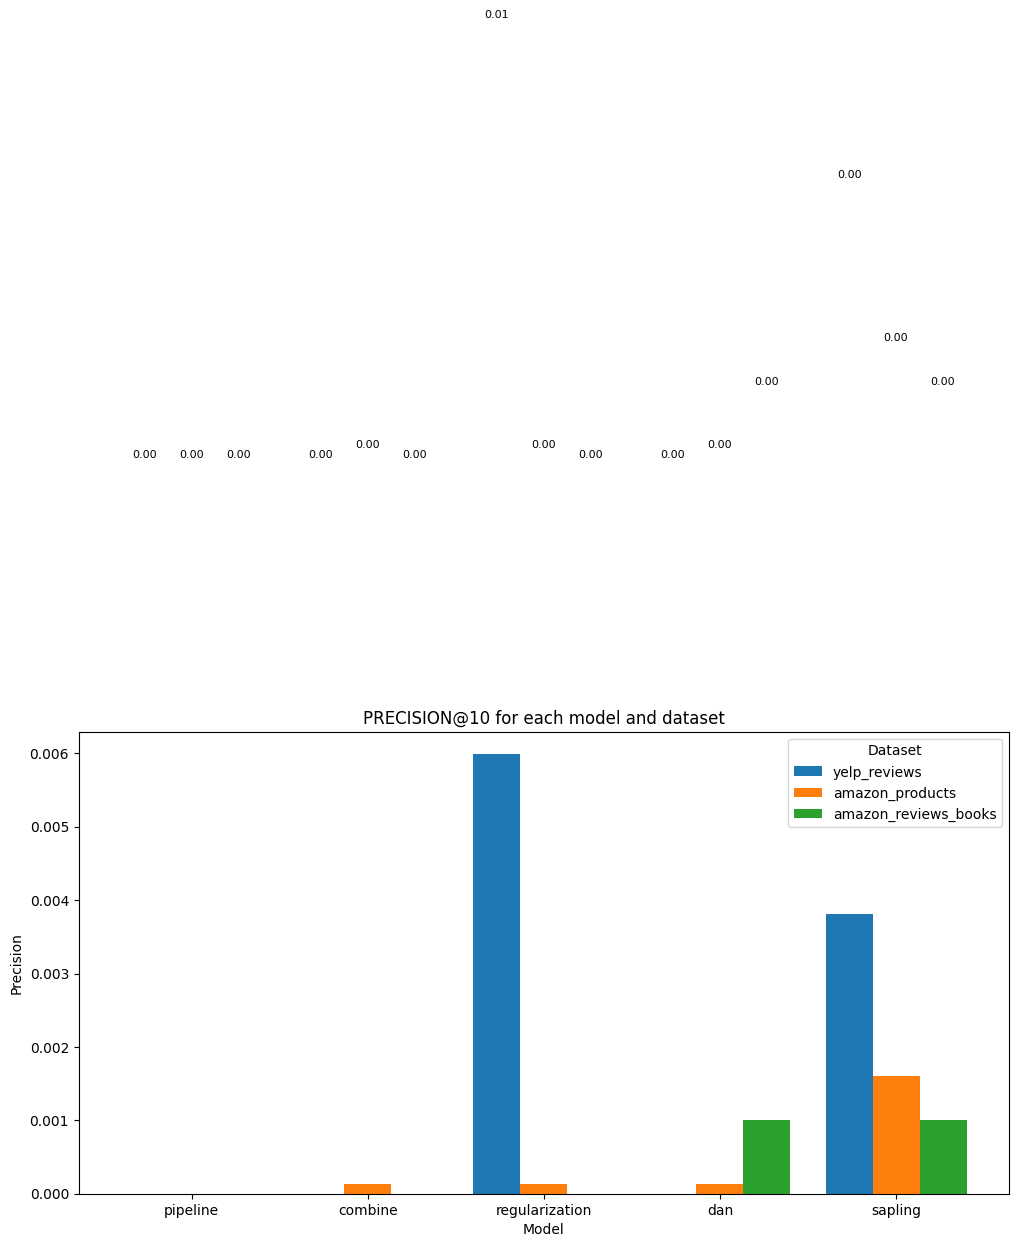

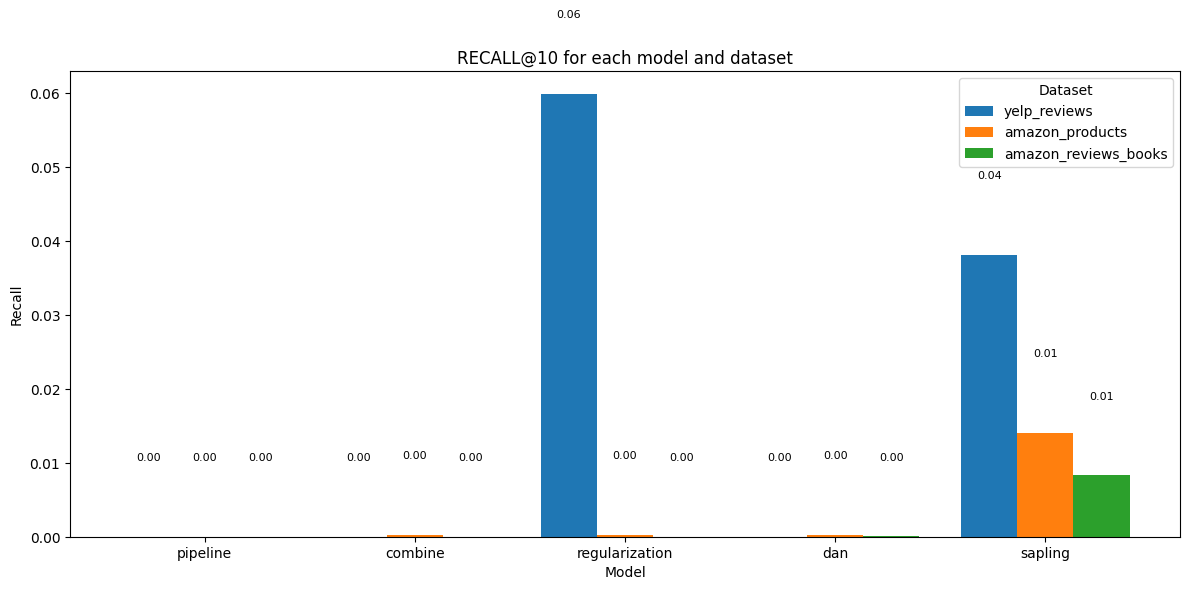

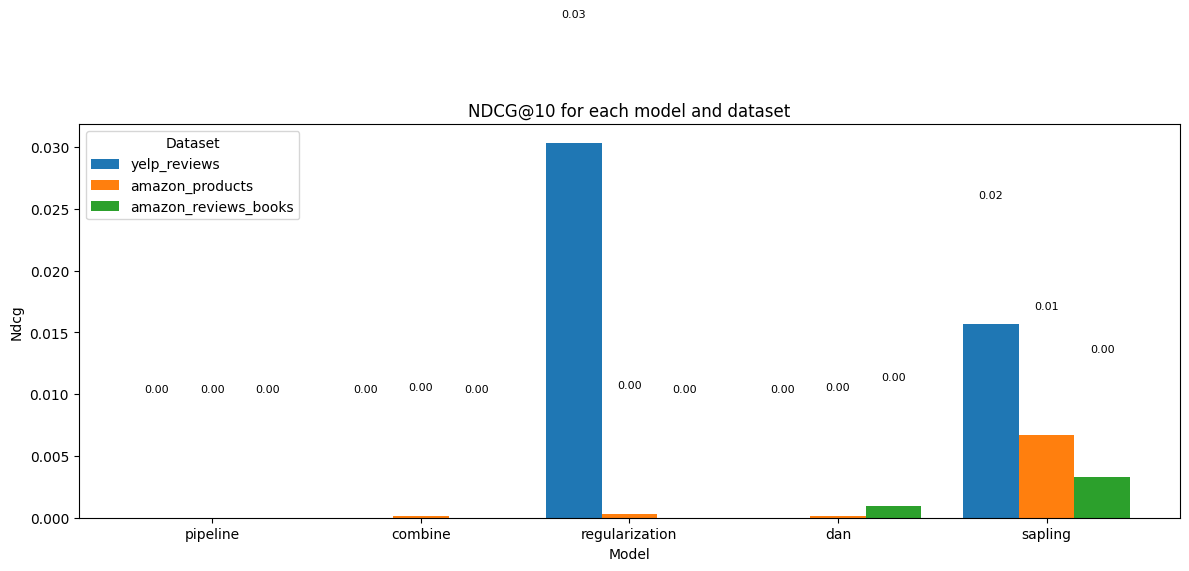

In [15]:
# Plots - k=10
from utils import plot_grouped_bar

plot_grouped_bar(results_df, "precision", 10)
plot_grouped_bar(results_df, "recall", 10)
plot_grouped_bar(results_df, "ndcg", 10)


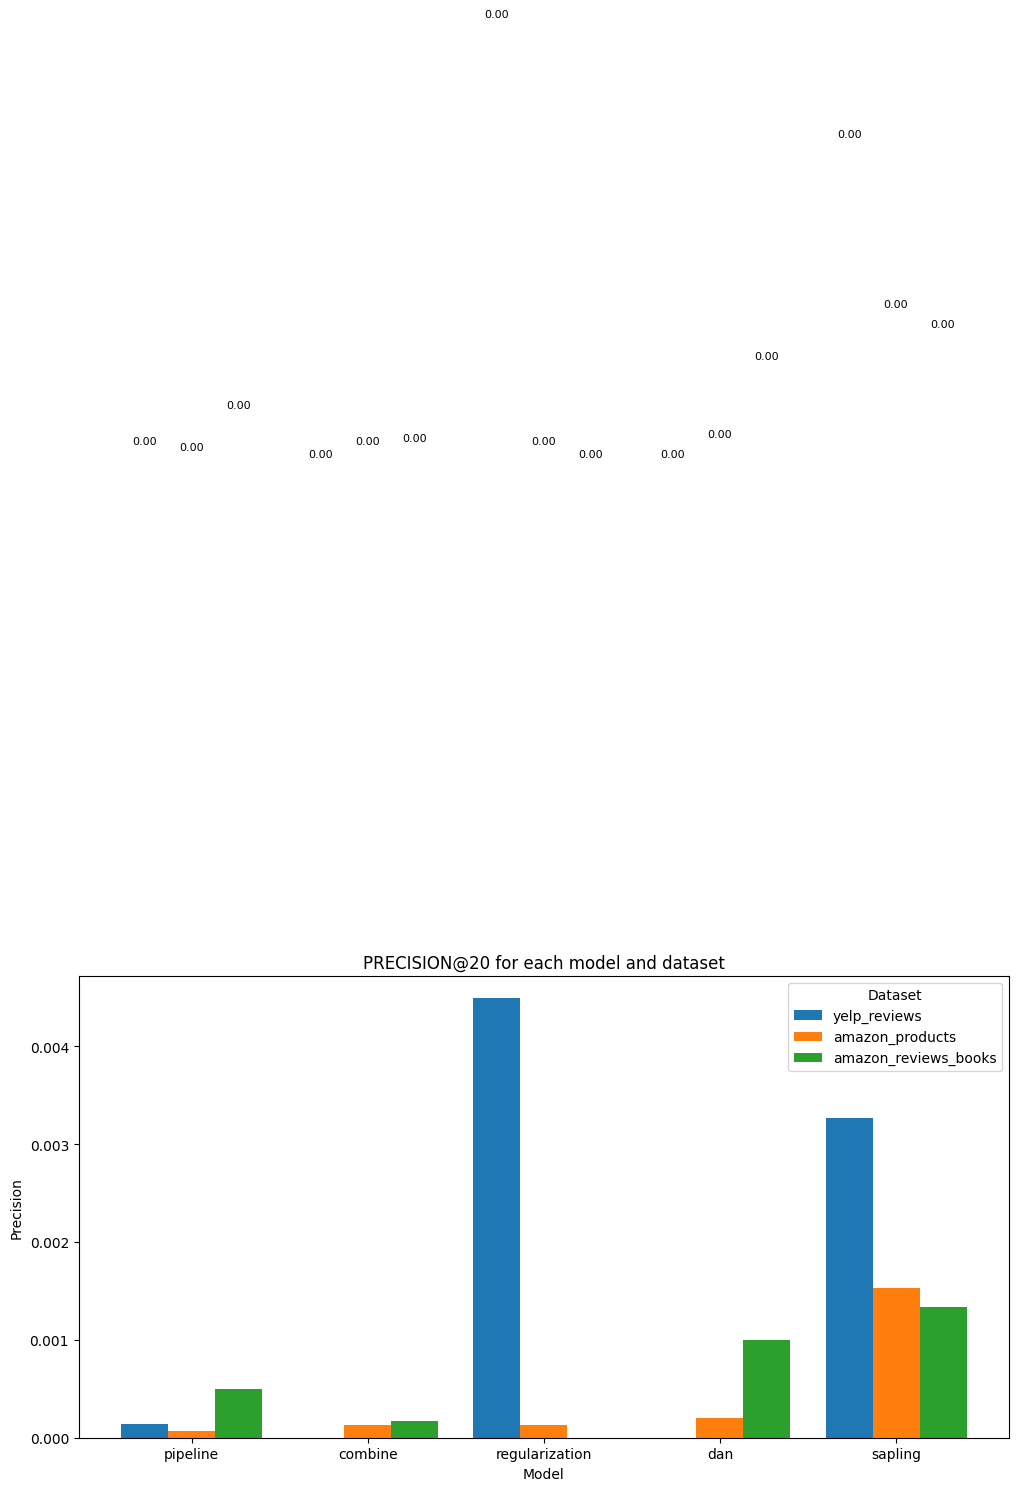

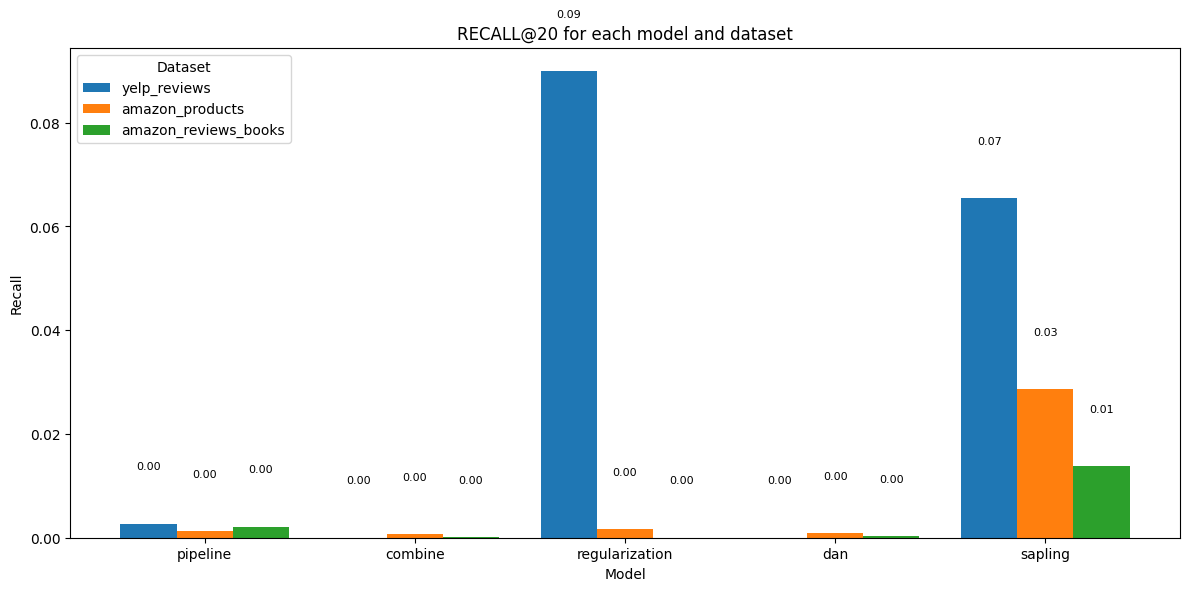

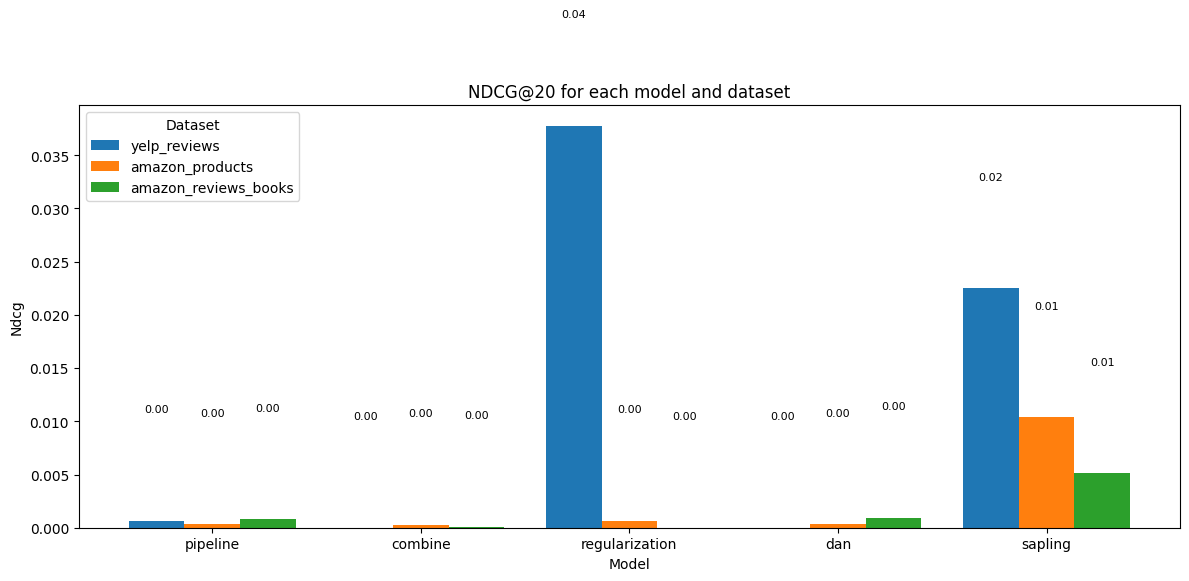

In [16]:
# Plots - k=20
plot_grouped_bar(results_df, "precision", 20)
plot_grouped_bar(results_df, "recall", 20)
plot_grouped_bar(results_df, "ndcg", 20)